# Name :- Nandan Kakadiya    

# Data Science & Business Analytics Intern

# GRIP APRIL 2021

## Task-1 : Prediction using supervised ML

In [2]:
# Let's import library to read csv file
import pandas as pd

In [3]:
#read the csv file with the help of pandas and create dataframe
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
#let's check how our data set looks
df.head()
#above function will print top 5 rows of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.shape

(25, 2)

here we have total 25 rows and 2 column

We want to predict the scores of student based on their hours of study,So here Dependent feature is Scores and independent feature is Hours

In [8]:
#let's import library to visualize our data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

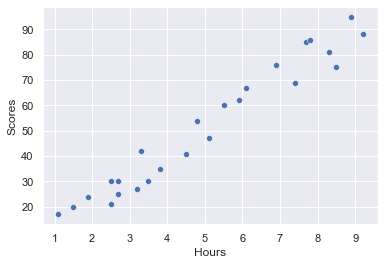

In [9]:
#let's check the relationship between independent and dependent feature
sns.scatterplot(data=df,x='Hours',y='Scores')

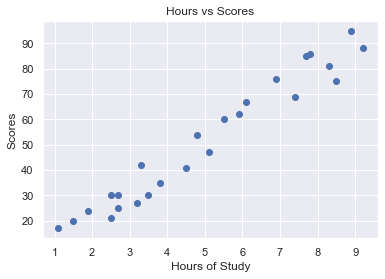

In [12]:
#we can plot this with the help of matplotlib too
plt.scatter(df['Hours'],df['Scores'])
plt.title('Hours vs Scores')
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.show()

from the both of the plot we can clearly see that score is linearly dependent to Hours of Study

In [14]:
#Check if there is any null values in Hours column of dataset
df['Hours'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Hours, dtype: bool

In [15]:
df['Hours'].isnull().sum()

0

In [16]:
df['Scores'].isnull().sum()

0

#### Prepare training data and for this create target(output) and input data

In [17]:
#independent variable
x=df.iloc[:,:-1]

In [18]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [19]:
#target(output) variable
y=df.iloc[:,1]

In [20]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

#### now let's split our data into training and test set with the help of sklearn

In [21]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2) 
#now 20% of our data is test data

In [31]:
#so our data is ready to train for that let's create instance of our model and fit the train data on it
from sklearn.linear_model import LinearRegression


In [32]:
lr=LinearRegression()

In [33]:
#let's fit our training data on our model
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
coef=lr.coef_
coef

array([9.90210293])

In [36]:
inter=lr.intercept_
inter

2.0056383756520972

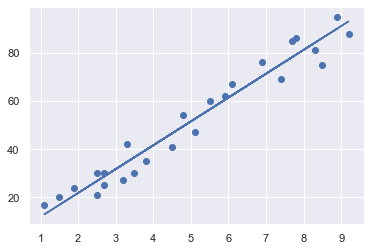

In [37]:
#let's plot our regression line for our data
rline = coef*x+inter

plt.scatter(x, y)
plt.plot(x, rline);
plt.show()

In [38]:
#let's check r2 score to know the model fit's well or not
from sklearn.metrics import r2_score

#let's predict for our test data that how much student will score
pred=lr.predict(x_test)


In [39]:
pred

array([84.19309268, 49.53573243, 52.50636331, 12.8979516 , 28.74131628])

#### let's evaluate our model with the help of r2 score and  mean absolute error

In [40]:
r2_score(y_test, pred)

0.9644144528574469

In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,pred)

4.201417648735395

In [54]:
#so our model predicts very well and gives good result for test data
#let's predict the score if student studies for 9.25 hours/day
hr=[[9.25]]
pred=lr.predict(hr)
pred

array([93.60009046])

In [56]:
print("if student studies for this many No of Hours ({} hours)".format(hr[0][0]))
print("Then he or she will able to get marks around = {}".format(pred[0]))

if student studies for this many No of Hours (9.25 hours)
Then he or she will able to get marks around = 93.60009046185112


#### looks like he or she is toper